### Exploring fatalities and crashes across time
- Objective is to find operators with the highest number of crashes 
- Select top 5 and observe across decade

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df = pd.read_json("data/silver/1920_2024_geopy_fixed.json")
df.Date = pd.to_datetime(df.Date)

In [3]:
df[df.Fatalities.apply(lambda x: x["total"] > 100 )][:5]

,Decade,Date,Time,Location,Operator,Flight_Num,Route,Ac_Type,Registration,Cn_Ln,Aboard,Fatalities,Ground,Summary,Aboard_Total,Fatalities_Total,Operator_vs_Military,Country_location
39,1950,1953-06-18,1634,"Tachikawa AFB, Tokyo, Japan",Military - U.S. Air Force,None,Tachikawa AB - Kimpo AB,Douglas C-124A Globemaster II,51-137A,43471,"{'total': 129, 'passengers': 122, 'crew': 7}","{'total': 129, 'passengers': 122, 'crew': 7}",0.0,Crashed shortly after taking off from Tachikaw...,129,129,Military,"{'place_id': 258971419, 'licence': 'Data © Ope..."
201,1990,1990-10-02,0915,"Guangzhou, China",China Southern Airlines / Xiamen Airlines,?/8301,Guangzhou - Shanghi,Boeing B-737-247 / Boeing B-757-21B,B-2812/B-2510,24758/282 / 23189/1072,"{'total': 226, 'passengers': 205, 'crew': 21}","{'total': 128, 'passengers': 121, 'crew': 7}",0.0,Shortly after taking off a hijacker entered th...,226,128,China Southern Airlines / Xiamen Airlines,"{'place_id': 236617514, 'licence': 'Data © Ope..."
251,1980,1984-10-11,05:40,"Near Omsk, Russia",Aeroflot,3352,Krasnodar - Omsk,Tupolev TU-154B,CCCP-85243,243,"{'total': 179, 'passengers': 170, 'crew': 9}","{'total': 174, 'passengers': 169, 'crew': 5}",4.0,"While landing, the crew noticed something on t...",179,174,Aeroflot,"{'place_id': 173174605, 'licence': 'Data © Ope..."
260,1980,1984-12-23,1415,"Near Kranoyarsk, Russia",Aeroflot,3519,Krasnoyarsk - Irkutsk,Tupolev TU-154B-2,CCCP-85338,338,"{'total': 111, 'passengers': 104, 'crew': 7}","{'total': 110, 'passengers': 103, 'crew': 7}",0.0,The aircraft crashed while attempting an emerg...,111,110,Aeroflot,"{'place_id': 173174605, 'licence': 'Data © Ope..."
273,1980,1985-02-19,0927,"Near Durango, Vizcaya, Spain",Iberia Airlines,610,Madrid - Bilbao,Boeing B-727-256,EC-DDU,21777/1487,"{'total': 148, 'passengers': 141, 'crew': 7}","{'total': 148, 'passengers': 141, 'crew': 7}",0.0,The aircraft crashed into an antenna on Mt. Oi...,148,148,Iberia Airlines,"{'place_id': 288220776, 'licence': 'Data © Ope..."


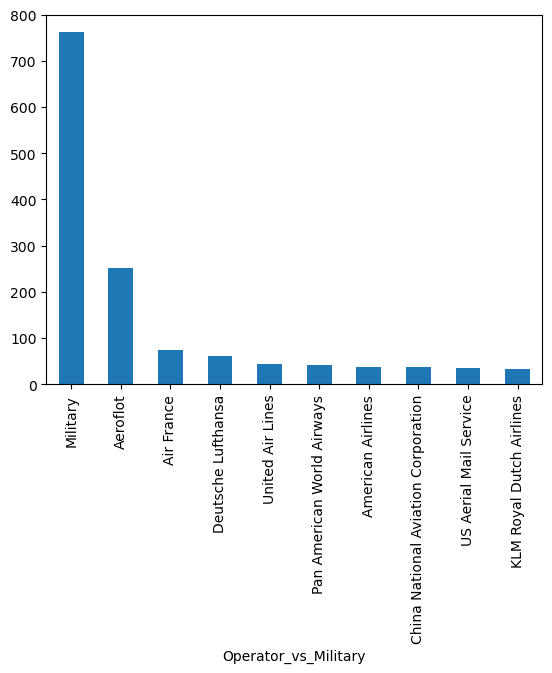

In [4]:
df.Operator_vs_Military.value_counts()[:10].plot(kind="bar")
pass

In [5]:
df3 = df[df.Operator_vs_Military.apply(lambda x : x in df.Operator_vs_Military.value_counts()[:5].index)]

In [6]:
df3[df3.Operator == 'United Air Lines'].groupby(["Decade"])["Fatalities_Total"].sum()

Decade
1930     87
1940    201
1950    230
1960    186
1970     56
1980    124
1990     26
2000    109
Name: Fatalities_Total, dtype: int64

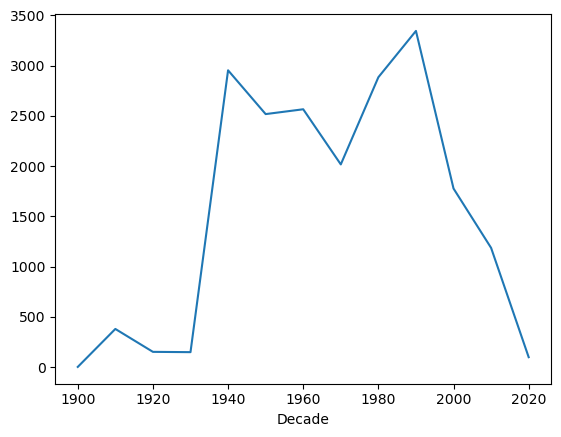

In [7]:
df[df.Operator_vs_Military == 'Military'].groupby(["Decade"])["Fatalities_Total"].sum().plot(x="Decade", y="Fatalities_Total")
pass

In [8]:
df[(df.Operator_vs_Military == 'Military') & (df.Decade > 2000) & (df.Decade < 2020)][:5]

,Decade,Date,Time,Location,Operator,Flight_Num,Route,Ac_Type,Registration,Cn_Ln,Aboard,Fatalities,Ground,Summary,Aboard_Total,Fatalities_Total,Operator_vs_Military,Country_location
2583,2010,2019-06-03,1300,"Near Lipo, India",Military - Indian Air Force,None,Jorhat-Rowriah - Mechuka,Antonov An-32,K2752,1009,"{'total': 13, 'passengers': 5, 'crew': 8}","{'total': 13, 'passengers': 5, 'crew': 8}",0.0,Crashed about 34km WNW of Mechuka.,13,13,Military,"{'place_id': 246884012, 'licence': 'Data © Ope..."
2584,2010,2019-07-30,200,"Rawalpindi, India",Military - Pakistan Army,None,Training,Beechcraft B300 King Air,766,B766,"{'total': 5, 'passengers': 0, 'crew': 5}","{'total': 5, 'passengers': 0, 'crew': 5}",14.0,"The Pakistani military plane, on a training fl...",5,5,Military,"{'place_id': 243213483, 'licence': 'Data © Ope..."
2593,2010,2018-03-06,1451,"Latakia, Syria",Military - Russian Air Force,None,Kuweires Air Base - Latakia-Khmeimim Air Base,Antonov An-26,RF-92955/52,10107,"{'total': 39, 'passengers': 33, 'crew': 6}","{'total': 39, 'passengers': 33, 'crew': 6}",0.0,While on approach to Latakia-Khmeimim Air Base...,39,39,Military,"{'place_id': 217707803, 'licence': 'Data © Ope..."
2597,2010,2018-04-11,0800,"Boufarik AB, Algeria",Military - Algerian Air Force,None,Boufarik AB - Bechar - Tindouf,Ilyushin 76-TD,7T-WIP,1043419636,"{'total': 257, 'passengers': 247, 'crew': 10}","{'total': 257, 'passengers': 247, 'crew': 10}",0.0,The Algerian military plane crashed soon after...,257,257,Military,"{'place_id': 77699763, 'licence': 'Data © Open..."
2599,2010,2018-05-02,1130,"Port Wentworth, Georgia",Military - US Air Force,None,Savannah - Tuscon,Lockheed HC-130H Hercules,65-0968,382-4110,"{'total': 9, 'passengers': 0, 'crew': 9}","{'total': 9, 'passengers': 0, 'crew': 9}",0.0,A Porto Rico Air National Guard plane crashed ...,9,9,Military,"{'place_id': 665581, 'licence': 'Data © OpenSt..."


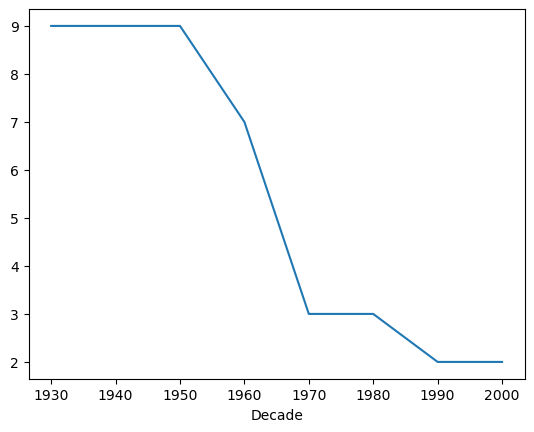

In [9]:
df[df.Operator == 'United Air Lines'].groupby(["Decade"])["Aboard_Total"].count().plot(x="Decade", y="Fatalities_Total")
pass

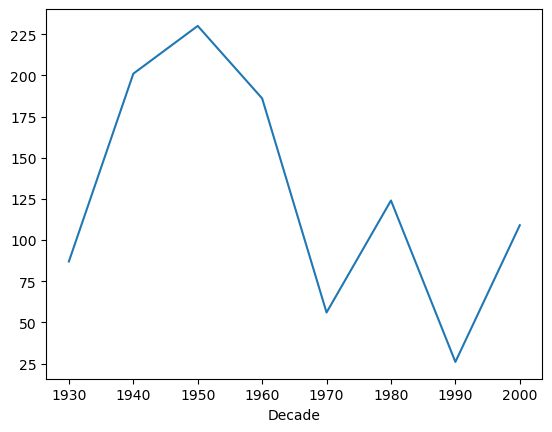

In [10]:
df[df.Operator == 'United Air Lines'].groupby(["Decade"])["Fatalities_Total"].sum().plot(x="Decade", y="Fatalities_Total")
pass

In [11]:
# # Plot for Operator A
# plt.figure(figsize=(10, 6))
# plt.plot(specific_operator[‘Decade’], specific_operator[‘Total Crashes’], marker=‘o’, linestyle=‘-’, color=‘b’, label=‘Operator A’)
# # Add the line for Operator B
# plt.plot(specific_operator_B[‘Decade’], specific_operator_B[‘Total Crashes’], marker=‘x’, linestyle=‘-’, color=‘r’, label=‘Operator B’)
# # Adding details
# plt.title(‘Total Crashes by Decade for Operators A and B’)
# plt.xlabel(‘Decade’)
# plt.ylabel(‘Total Crashes’)
# plt.legend()  # This adds the legend to differentiate the lines
# plt.grid(True)
# plt.xticks(specific_operator[‘Decade’])  # Ensure all decades are shown; adjust if necessary
# plt.show()

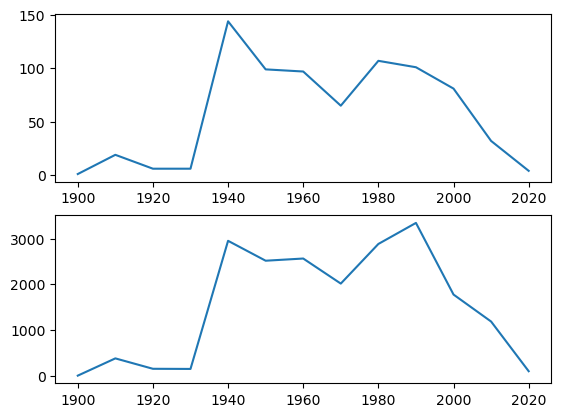

In [12]:
fig, ax = plt.subplots(2,1)
ax[1].plot(df[df.Operator_vs_Military == 'Military'].groupby(["Decade"])["Fatalities_Total"].sum())
ax[0].plot(df[df.Operator_vs_Military == 'Military'].groupby(["Decade"])["Aboard_Total"].count())
pass


In [13]:
def to_plot_chart(x):
    fig, ax = plt.subplots(2,1)
    ax[1].plot(df[df.Operator_vs_Military == x].groupby(["Decade"])["Fatalities_Total"].sum())
    ax[0].plot(df[df.Operator_vs_Military == x].groupby(["Decade"])["Aboard_Total"].count())

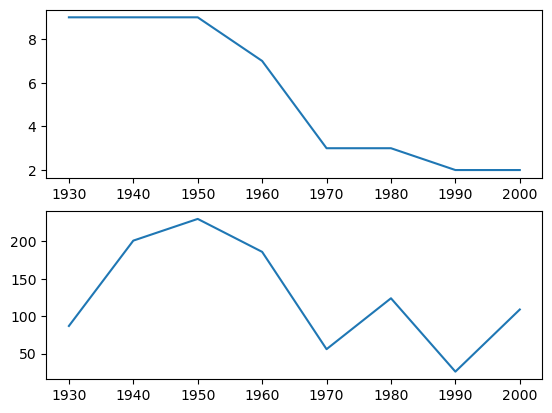

In [14]:
to_plot_chart('United Air Lines')

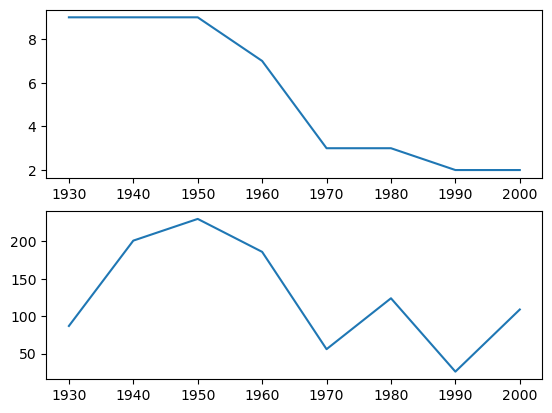

In [15]:
to_plot_chart('United Air Lines')

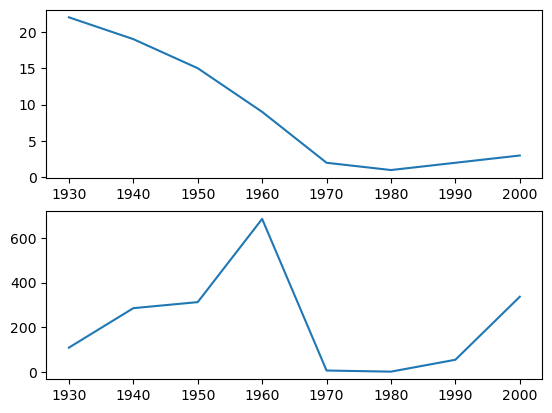

In [16]:
to_plot_chart('Air France')

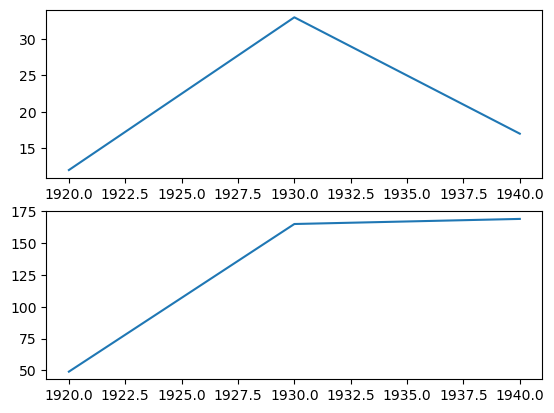

In [17]:
to_plot_chart('Deutsche Lufthansa')

In [18]:
df[(df.Operator == 'Deutsche Lufthansa')]

,Decade,Date,Time,Location,Operator,Flight_Num,Route,Ac_Type,Registration,Cn_Ln,Aboard,Fatalities,Ground,Summary,Aboard_Total,Fatalities_Total,Operator_vs_Military,Country_location
590,1940,1944-01-15,1345,"Belgrad, Yugoslavia",Deutsche Lufthansa,None,Thessaloniki - Belgrade,Junkers JU-52/3m,D-ADQW,640610,"{'total': 5, 'passengers': 3, 'crew': 2}","{'total': 5, 'passengers': 3, 'crew': 2}",0.0,While approaching to land the aircraft was too...,5,5,Deutsche Lufthansa,"{'place_id': 86435550, 'licence': 'Data © Open..."
594,1940,1944-02-21,1710,"Eubeoa, Greece",Deutsche Lufthansa,None,None,Junkers JU-52/3m,D-ABAS,6561,"{'total': 16, 'passengers': 13, 'crew': 3}","{'total': 16, 'passengers': 13, 'crew': 3}",0.0,"After radioing they were returning , the plane...",16,16,Deutsche Lufthansa,"{'place_id': 80394471, 'licence': 'Data © Open..."
597,1940,1944-04-17,None,"Belgrad, Yugoslavia",Deutsche Lufthansa,None,Vienna - Belgrade - Sofia - Thessaloniki - Athens,Junkers JU-52/3m,D-AOCA,640996,"{'total': 7, 'passengers': 4, 'crew': 3}","{'total': 5, 'passengers': 4, 'crew': 1}",0.0,Shot down by allied fighters.,7,5,Deutsche Lufthansa,"{'place_id': 86435550, 'licence': 'Data © Open..."
598,1940,1944-04-21,None,"Frederikstad, Norway",Deutsche Lufthansa,None,Copenhagen - Oslo,Douglas DC-3,D-AAIG,2095,"{'total': 20, 'passengers': 17, 'crew': 3}","{'total': 9, 'passengers': 6, 'crew': 3}",0.0,Crashed 50 miles from its destination after a...,20,9,Deutsche Lufthansa,"{'place_id': 175638009, 'licence': 'Data © Ope..."
620,1940,1944-09-02,None,"Belgrad, Yugoslavia",Deutsche Lufthansa,None,Athens - Sofia - Belgrade - Vienna,Junkers JU52/3m,D-AUAW,641039,"{'total': 5, 'passengers': 2, 'crew': 3}","{'total': 5, 'passengers': 2, 'crew': 3}",0.0,Shot down by allied fighters.,5,5,Deutsche Lufthansa,"{'place_id': 86435550, 'licence': 'Data © Open..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3249,1920,1928-09-06,None,"Heroldbach, Germany",Deutsche Lufthansa,None,None,Fokker FG III,D-180,1531,"{'total': 3, 'passengers': 2, 'crew': 1}","{'total': 3, 'passengers': 2, 'crew': 1}",0.0,Crashed due to engine failure.,3,3,Deutsche Lufthansa,"{'place_id': 150810207, 'licence': 'Data © Ope..."
3260,1920,1928-12-11,None,"Letzlingen, Germany",Deutsche Lufthansa,None,Cologne - Berlin,Junkers G-31,D-1473,3005,"{'total': 4, 'passengers': 1, 'crew': 3}","{'total': 3, 'passengers': 0, 'crew': 3}",0.0,"After a fuel line broke in flight, the pilot w...",4,3,Deutsche Lufthansa,"{'place_id': 158856880, 'licence': 'Data © Ope..."
3450,1920,1929-08-24,None,"Elm, Germany",Deutsche Lufthansa,None,Frankfurt - Berlin,Fokker FG II,D-757,1571,"{'total': 5, 'passengers': 4, 'crew': 1}","{'total': 4, 'passengers': 3, 'crew': 1}",0.0,The aorcraft hit a hill in fog and poor visibi...,5,4,Deutsche Lufthansa,"{'place_id': 158768968, 'licence': 'Data © Ope..."
3463,1920,1929-11-06,1010,"Near Godstone, Surrey, England",Deutsche Lufthansa,None,Croyden - Amsterdam - Berlin,Junkers G-24,D-903,911,"{'total': 8, 'passengers': 4, 'crew': 4}","{'total': 7, 'passengers': 3, 'crew': 4}",0.0,After the plane's antenna wire struck the grou...,8,7,Deutsche Lufthansa,"{'place_id': 270463650, 'licence': 'Data © Ope..."


In [19]:
df[(df.Operator == 'United Air Lines') & (df.Decade > 1990)]

,Decade,Date,Time,Location,Operator,Flight_Num,Route,Ac_Type,Registration,Cn_Ln,Aboard,Fatalities,Ground,Summary,Aboard_Total,Fatalities_Total,Operator_vs_Military,Country_location
2759,2000,2001-09-11,0903,"New York City, New York",United Air Lines,175,Boston - Los Angeles,Boeing B-767-222,N612UA,21873/41,"{'total': 65, 'passengers': 56, 'crew': 9}","{'total': 65, 'passengers': 56, 'crew': 9}",2750.0,The aircraft was hijacked shortly after it lef...,65,65,United Air Lines,"{'place_id': 371663561, 'licence': 'Data © Ope..."
2760,2000,2001-09-11,1003,"Shanksville, Pennsylvania",United Air Lines,93,Newark - San Francisco,Boeing B-757-222,N591UA,28142/718,"{'total': 44, 'passengers': 37, 'crew': 7}","{'total': 44, 'passengers': 37, 'crew': 7}",0.0,The aircraft was hijacked after taking off fro...,44,44,United Air Lines,"{'place_id': 6167425, 'licence': 'Data © OpenS..."


In [20]:
df.Operator.value_counts()[:5]

Operator
Aeroflot                     251
Military - U.S. Air Force    141
Air France                    73
Deutsche Lufthansa            62
United Air Lines              44
Name: count, dtype: int64

For the two plains in 9/11 the ground was counted twice
- We split the count into two 2750 / 2 

In [21]:
print(df.iloc[2759].Ground / 2)
df.loc[2758, "Ground"] = 1375
df.loc[2759, "Ground"] = 1375

0.0


Compare Data source with wiki to cross reference dates and fatalities 

In [22]:
df[df.Date == "2001-09-11"]

,Decade,Date,Time,Location,Operator,Flight_Num,Route,Ac_Type,Registration,Cn_Ln,Aboard,Fatalities,Ground,Summary,Aboard_Total,Fatalities_Total,Operator_vs_Military,Country_location
2757,2000,2001-09-11,0945,"Arlington, Virginia.",American Airlines,77,Washington D.C. - Los Angeles,Boeing B-757-223,N644AA,24602/365,"{'total': 64, 'passengers': 58, 'crew': 6}","{'total': 64, 'passengers': 58, 'crew': 6}",125.0,The aircraft was hijacked after taking off fro...,64,64,American Airlines,"{'place_id': 4249947, 'licence': 'Data © OpenS..."
2758,2000,2001-09-11,0847,"New York City, New York",American Airlines,11,Boston - Los Angeles,Boeing 767-223ER,N334AA,22332/169,"{'total': 92, 'passengers': 81, 'crew': 11}","{'total': 92, 'passengers': 81, 'crew': 11}",1375.0,The aircraft was hijacked shortly after it lef...,92,92,American Airlines,"{'place_id': 371663561, 'licence': 'Data © Ope..."
2759,2000,2001-09-11,0903,"New York City, New York",United Air Lines,175,Boston - Los Angeles,Boeing B-767-222,N612UA,21873/41,"{'total': 65, 'passengers': 56, 'crew': 9}","{'total': 65, 'passengers': 56, 'crew': 9}",1375.0,The aircraft was hijacked shortly after it lef...,65,65,United Air Lines,"{'place_id': 371663561, 'licence': 'Data © Ope..."
2760,2000,2001-09-11,1003,"Shanksville, Pennsylvania",United Air Lines,93,Newark - San Francisco,Boeing B-757-222,N591UA,28142/718,"{'total': 44, 'passengers': 37, 'crew': 7}","{'total': 44, 'passengers': 37, 'crew': 7}",0.0,The aircraft was hijacked after taking off fro...,44,44,United Air Lines,"{'place_id': 6167425, 'licence': 'Data © OpenS..."


In [23]:
df[df.Date == "1977-03-27"]

,Decade,Date,Time,Location,Operator,Flight_Num,Route,Ac_Type,Registration,Cn_Ln,Aboard,Fatalities,Ground,Summary,Aboard_Total,Fatalities_Total,Operator_vs_Military,Country_location
4639,1970,1977-03-27,1707,"Tenerife, Canary Islands",Pan American World Airways / KLM,1736/4805,Tenerife - Las Palmas / Tenerife - Las Palmas,Boeing B-747-121 / Boeing B-747-206B,N736PA/PH-BUF,19643/11 / 20400/157,"{'total': 644, 'passengers': 614, 'crew': 30}","{'total': 583, 'passengers': 560, 'crew': 23}",0.0,Both aircraft were diverted to Tenerife becaus...,644,583,Pan American World Airways / KLM,"{'place_id': 288818787, 'licence': 'Data © Ope..."


In [24]:
df.Date.value_counts()[df.Date.value_counts() > 1]
# Good to know that we can have more than one crash in a single day

Date
1988-08-31    4
2001-09-11    4
1971-07-30    3
1970-12-31    3
1929-09-17    3
             ..
1953-06-15    2
1937-12-05    2
1998-01-13    2
2001-10-10    2
1996-12-24    2
Name: count, Length: 398, dtype: int64